In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

# Importation des datasets

In [2]:
filename = '../datasets/all_analysis_data.txt'

In [3]:
labels = pd.read_csv('../datasets/labels.txt', header=None)

In [4]:
labels.head()

,0
0,Trojan
1,Trojan
2,Backdoor
3,Backdoor
4,Trojan


In [5]:
dataset = pd.read_csv(filename, header=None)

In [6]:
dataset.head()

,0
0,ldrloaddll ldrgetprocedureaddress ldrloaddll l...
1,getsystemtimeasfiletime ntallocatevirtualmemor...
2,ldrgetdllhandle ldrgetprocedureaddress getsyst...
3,ldrloaddll ldrgetprocedureaddress ldrloaddll l...
4,ldrloaddll ldrgetprocedureaddress ldrgetproced...


# Transformation du dataset en array de nombres

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
dataset_array = dataset.values

In [9]:
dataset_array = dataset_array[:,0]

In [10]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset_array)  
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
vectorizer.vocabulary_

{'ldrloaddll': 132,
 'ldrgetprocedureaddress': 131,
 'regopenkeyexa': 221,
 'ntopenkey': 169,
 'ntqueryvaluekey': 181,
 'ntclose': 150,
 'ntqueryattributesfile': 176,
 'loadstringa': 136,
 'ntallocatevirtualmemory': 149,
 'ldrgetdllhandle': 130,
 'ldrunloaddll': 133,
 'findfirstfileexw': 52,
 'copyfilea': 13,
 'regcreatekeyexa': 209,
 'regsetvalueexa': 227,
 'regclosekey': 208,
 'createprocessinternalw': 21,
 'ntfreevirtualmemory': 164,
 'ntterminateprocess': 190,
 'getsystemtimeasfiletime': 92,
 'setunhandledexceptionfilter': 252,
 'ntcreatemutant': 153,
 'getsysteminfo': 90,
 'getsystemdirectoryw': 89,
 '__exception__': 1,
 'ntprotectvirtualmemory': 175,
 'coinitializeex': 9,
 'regqueryvalueexa': 225,
 'getshortpathnamew': 86,
 'ntcreatefile': 151,
 'getfilesize': 76,
 'ntreadfile': 183,
 'writeprocessmemory': 272,
 'createremotethread': 22,
 'ntcreatesection': 154,
 'ntmapviewofsection': 166,
 'ntunmapviewofsection': 192,
 'couninitialize': 16,
 'getsystemdirectorya': 88,
 'setfilep

# Analyse des donneees

In [12]:
import matplotlib.pyplot as plt

In [13]:
#create an array with lavbels as first column and data as second column
data_analysis = np.column_stack((labels, X.toarray()))

## Nombre de samples

Text(0.5, 1.0, 'Number of samples per class')

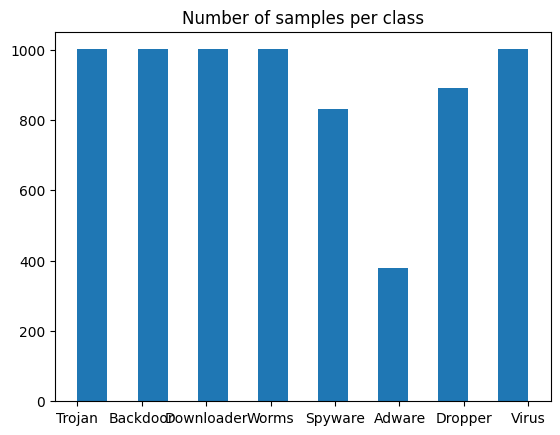

In [14]:
#plot the number of samples per class
plt.hist(data_analysis[:,0], bins=15)
plt.title("Number of samples per class")

In [15]:
X.toarray().shape
X_arr = X.toarray()

#create a dataframe with the label as first col and the lenght of the text as second col
data_analysis_length = np.column_stack((labels, X_arr))
data_analysis_length_for_reccurent = data_analysis_length.copy()

# get the lenght of the text
for i in range (0, len(data_analysis_length)):
    for j in range (0, len(data_analysis_length[i])):
        if data_analysis_length[i][j] != 0:
            data_analysis_length[i][1] += 1
# data_analysis_length[:,1] = np.sum(data_analysis[:,1:1000], axis=1)
data_analysis_length = data_analysis_length[:,[0,1]]
data_analysis_length

array([['Trojan', 21],
       ['Trojan', 34],
       ['Backdoor', 24],
       ...,
       ['Virus', 36],
       ['Virus', 17],
       ['Virus', 21]], dtype=object)

In [16]:
data_analysis_length_per_class = np.zeros((8,3))

map = {"Trojan": 0, "Backdoor": 1, "Worms": 2, "Virus": 3, "Adware": 4, "Spyware": 5, "Dropper": 6, "Downloader": 7}

for i in range (0,8,1):
    data_analysis_length_per_class[i][0] = i
    data_analysis_length_per_class[i][1] = 0
    data_analysis_length_per_class[i][2] = 0

for i in range (0, len(data_analysis_length)):
        match data_analysis_length[i][0]:
            case "Trojan":
                data_analysis_length_per_class[0][1] += data_analysis_length[i][1]
                data_analysis_length_per_class[0][2] += 1
            case "Backdoor":
                data_analysis_length_per_class[1][1] += data_analysis_length[i][1]
                data_analysis_length_per_class[1][2] += 1
            case "Worms":
                data_analysis_length_per_class[2][1] += data_analysis_length[i][1]
                data_analysis_length_per_class[2][2] += 1
            case "Virus":
                data_analysis_length_per_class[3][1] += data_analysis_length[i][1]
                data_analysis_length_per_class[3][2] += 1
            case "Adware":
                data_analysis_length_per_class[4][1] += data_analysis_length[i][1]
                data_analysis_length_per_class[4][2] += 1
            case "Spyware":
                data_analysis_length_per_class[5][1] += data_analysis_length[i][1]
                data_analysis_length_per_class[5][2] += 1
            case "Dropper":
                data_analysis_length_per_class[6][1] += data_analysis_length[i][1]
                data_analysis_length_per_class[6][2] += 1
            case "Downloader":
                data_analysis_length_per_class[7][1] += data_analysis_length[i][1]
                data_analysis_length_per_class[7][2] += 1
            case _:
                print("Error")

print(np.mean(data_analysis_length[:,1]))

print(data_analysis_length_per_class)

44.231884057971016
[[0.0000e+00 4.6246e+04 1.0010e+03]
 [1.0000e+00 4.3372e+04 1.0010e+03]
 [2.0000e+00 4.2069e+04 1.0010e+03]
 [3.0000e+00 4.1962e+04 1.0010e+03]
 [4.0000e+00 2.2269e+04 3.7900e+02]
 [5.0000e+00 3.5241e+04 8.3200e+02]
 [6.0000e+00 3.3610e+04 8.9100e+02]
 [7.0000e+00 4.9587e+04 1.0010e+03]]


In [17]:
#get the average length of the samples per class
for i in range (0, len(data_analysis_length_per_class)):
    data_analysis_length_per_class[i][1] = data_analysis_length_per_class[i][1] / data_analysis_length_per_class[i][2] 

print(data_analysis_length_per_class)

df_analysis_length = pd.DataFrame(data_analysis_length_per_class, columns = ['Class', 'Average Length', 'Number of Samples'])

df_analysis_length

[[0.00000000e+00 4.61998002e+01 1.00100000e+03]
 [1.00000000e+00 4.33286713e+01 1.00100000e+03]
 [2.00000000e+00 4.20269730e+01 1.00100000e+03]
 [3.00000000e+00 4.19200799e+01 1.00100000e+03]
 [4.00000000e+00 5.87572559e+01 3.79000000e+02]
 [5.00000000e+00 4.23569712e+01 8.32000000e+02]
 [6.00000000e+00 3.77216611e+01 8.91000000e+02]
 [7.00000000e+00 4.95374625e+01 1.00100000e+03]]


,Class,Average Length,Number of Samples
0,0.0,46.199800,1001.0
1,1.0,43.328671,1001.0
2,2.0,42.026973,1001.0
3,3.0,41.920080,1001.0
4,4.0,58.757256,379.0
5,5.0,42.356971,832.0
6,6.0,37.721661,891.0
7,7.0,49.537463,1001.0


In [18]:
df_analysis_length['Class'] = df_analysis_length['Class'].map(str)

df_analysis_length.at[0, 'Class'] = 'Trojan'
df_analysis_length.at[1, 'Class'] = 'Backdoor'
df_analysis_length.at[2, 'Class'] = 'Worms'
df_analysis_length.at[3, 'Class'] = 'Virus'
df_analysis_length.at[4, 'Class'] = 'Adware'
df_analysis_length.at[5, 'Class'] = 'Spyware'
df_analysis_length.at[6, 'Class'] = 'Dropper'
df_analysis_length.at[7, 'Class'] = 'Downloader'

df_analysis_length

,Class,Average Length,Number of Samples
0,Trojan,46.199800,1001.0
1,Backdoor,43.328671,1001.0
2,Worms,42.026973,1001.0
3,Virus,41.920080,1001.0
4,Adware,58.757256,379.0
5,Spyware,42.356971,832.0
6,Dropper,37.721661,891.0
7,Downloader,49.537463,1001.0


## Average lenght par sample par class

<Axes: title={'center': 'Average Length of the Samples per Class'}, xlabel='Class'>

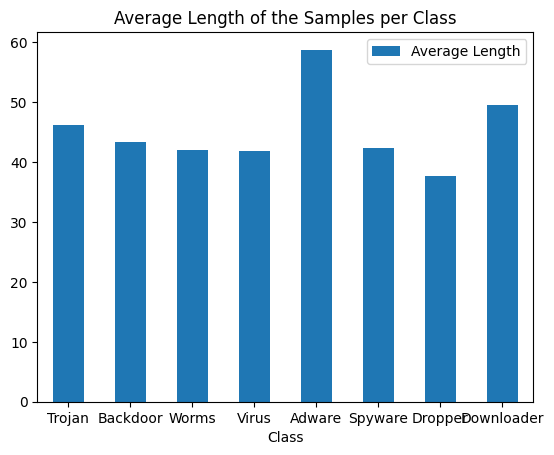

In [19]:
df_analysis_length.plot.bar(x='Class', y='Average Length', rot=0, title="Average Length of the Samples per Class")

In [20]:
#get average number of different words per class
df_analysis_words_per_class = pd.DataFrame(columns=['Class', 'Calls'])

df_analysis_words_per_class['Class'].map(str)
df_analysis_words_per_class['Calls'].map(str)

df_analysis_words_per_class.at[0, 'Class'] = 'Trojan'
df_analysis_words_per_class.at[1, 'Class'] = 'Backdoor'
df_analysis_words_per_class.at[2, 'Class'] = 'Worms'
df_analysis_words_per_class.at[3, 'Class'] = 'Virus'
df_analysis_words_per_class.at[4, 'Class'] = 'Adware'
df_analysis_words_per_class.at[5, 'Class'] = 'Spyware'
df_analysis_words_per_class.at[6, 'Class'] = 'Dropper'
df_analysis_words_per_class.at[7, 'Class'] = 'Downloader'

df_analysis_words_per_class.at[0, 'Calls'] = set()
df_analysis_words_per_class.at[1, 'Calls'] = set()
df_analysis_words_per_class.at[2, 'Calls'] = set()
df_analysis_words_per_class.at[3, 'Calls'] = set()
df_analysis_words_per_class.at[4, 'Calls'] = set()
df_analysis_words_per_class.at[5, 'Calls'] = set()
df_analysis_words_per_class.at[6, 'Calls'] = set()
df_analysis_words_per_class.at[7, 'Calls'] = set()


for i in range (0, len(data_analysis)):
    match data_analysis[i][0]:
        case "Trojan":
            for j in range(0, len(data_analysis[i])):
                df_analysis_words_per_class.at[0, 'Calls'].add(data_analysis[i][j])

        case "Backdoor":
            for j in range(0, len(data_analysis[i])):
                df_analysis_words_per_class.at[1, 'Calls'].add(data_analysis[i][j])
        case "Worms":
            for j in range(0, len(data_analysis[i])):
                df_analysis_words_per_class.at[2, 'Calls'].add(data_analysis[i][j])
        case "Virus":
            for j in range(0, len(data_analysis[i])):
                df_analysis_words_per_class.at[3, 'Calls'].add(data_analysis[i][j])
        case "Adware":
            for j in range(0, len(data_analysis[i])):
                df_analysis_words_per_class.at[4, 'Calls'].add(data_analysis[i][j])
        case "Spyware":
            for j in range(0, len(data_analysis[i])):
                df_analysis_words_per_class.at[5, 'Calls'].add(data_analysis[i][j])
        case "Dropper":
            for j in range(0, len(data_analysis[i])):
                df_analysis_words_per_class.at[6, 'Calls'].add(data_analysis[i][j])
        case "Downloader":
            for j in range(0, len(data_analysis[i])):
                df_analysis_words_per_class.at[7, 'Calls'].add(data_analysis[i][j])
        case _:
            print("Error")   


In [21]:
#get the number of different words per class
for i in range (0, len(df_analysis_words_per_class)):
    df_analysis_words_per_class.at[i, 'Calls'] = len(df_analysis_words_per_class.at[i, 'Calls'])

df_analysis_words_per_class


,Class,Calls
0,Trojan,1048
1,Backdoor,1035
2,Worms,1496
3,Virus,1385
4,Adware,451
5,Spyware,980
6,Dropper,819
7,Downloader,664


## Nombres de calls uniques par class

<Axes: title={'center': 'Number of unique calls per class'}, xlabel='Class'>

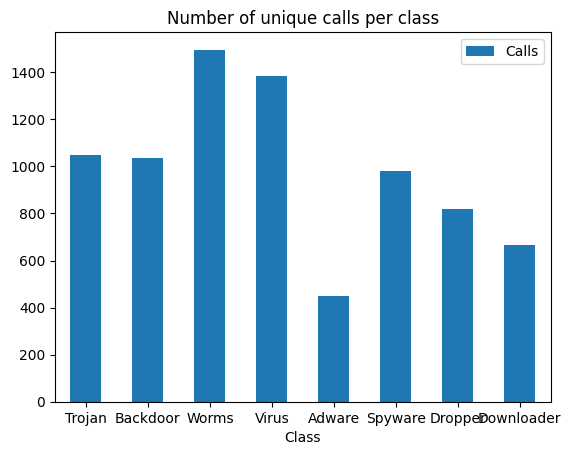

In [22]:
df_analysis_words_per_class.plot.bar(x='Class', y='Calls', rot=0, title="Number of unique calls per class")

In [23]:
#get average number of different words per sample per class
df_analysis_words_per_class_average = df_analysis_words_per_class.copy()
df_analysis_words_per_class_average['Calls'] = df_analysis_words_per_class['Calls'] / df_analysis_length['Average Length']
df_analysis_words_per_class_average

,Class,Calls
0,Trojan,22.684081
1,Backdoor,23.887185
2,Worms,35.596187
3,Virus,33.039059
4,Adware,7.675648
5,Spyware,23.136687
6,Dropper,21.711663
7,Downloader,13.403997


## Average des calls uniques par sample

<Axes: title={'center': 'Average Length of the Samples per Class'}, xlabel='Class'>

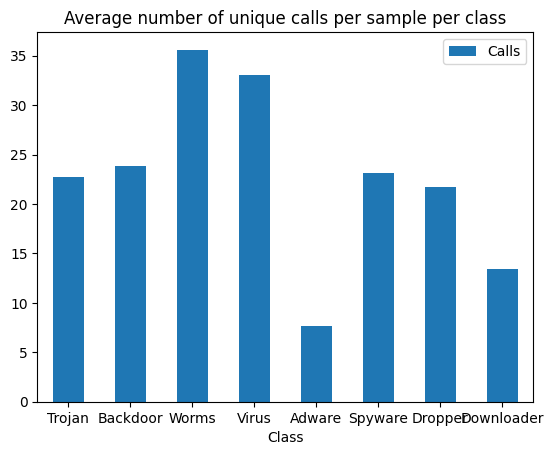

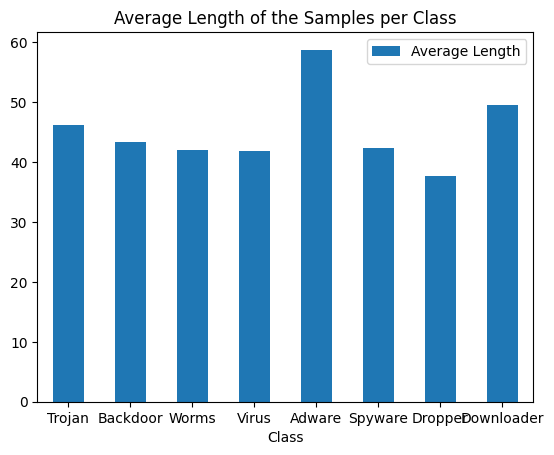

In [24]:
df_analysis_words_per_class_average.plot.bar(x='Class', y='Calls', rot=0, title="Average number of unique calls per sample per class")
df_analysis_length.plot.bar(x='Class', y='Average Length', rot=0, title="Average Length of the Samples per Class")

In [25]:
import itertools
import operator

def most_common(L):
  # get an iterable of (item, iterable) pairs
  SL = sorted((x, i) for i, x in enumerate(L))
  # print 'SL:', SL
  groups = itertools.groupby(SL, key=operator.itemgetter(0))
  # auxiliary function to get "quality" for an item
  def _auxfun(g):
    item, iterable = g
    count = 0
    min_index = len(L)
    for _, where in iterable:
      count += 1
      min_index = min(min_index, where)
    # print 'item %r, count %r, minind %r' % (item, count, min_index)
    return count, -min_index
  # pick the highest-count/earliest item
  return max(groups, key=_auxfun)[0]


In [26]:
#get top most common words per class
df_analysis_top = df_analysis_length.copy()

#create a list of lists 
tmp = []
for i in range (0, len(data_analysis_length)):
    tmp.append([])

for i in range (0, len(data_analysis_length_for_reccurent)):
    data_analysis_length_for_reccurent[i].tolist()
    for j in range (0, len(data_analysis_length_for_reccurent[i])):
        if data_analysis_length_for_reccurent[i][j] != 0:
            tmp[i].append(data_analysis_length_for_reccurent[i][j])

df_analysis_top_per_class = pd.DataFrame(columns=['Class', 'most_commons'])
df_analysis_top_per_class.at[0, 'Class'] = 'Trojan'
df_analysis_top_per_class.at[1, 'Class'] = 'Backdoor'
df_analysis_top_per_class.at[2, 'Class'] = 'Worms'
df_analysis_top_per_class.at[3, 'Class'] = 'Virus'
df_analysis_top_per_class.at[4, 'Class'] = 'Adware'
df_analysis_top_per_class.at[5, 'Class'] = 'Spyware'
df_analysis_top_per_class.at[6, 'Class'] = 'Dropper'
df_analysis_top_per_class.at[7, 'Class'] = 'Downloader'

df_analysis_top_per_class['most_commons'].map(str)

df_analysis_top_per_class.at[0, 'most_commons'] = set()
df_analysis_top_per_class.at[1, 'most_commons'] = set()
df_analysis_top_per_class.at[2, 'most_commons'] = set()
df_analysis_top_per_class.at[3, 'most_commons'] = set()
df_analysis_top_per_class.at[4, 'most_commons'] = set()
df_analysis_top_per_class.at[5, 'most_commons'] = set()
df_analysis_top_per_class.at[6, 'most_commons'] = set()
df_analysis_top_per_class.at[7, 'most_commons'] = set()


for i in range (0, len(tmp)):
    match tmp[i][0]:
        case 'Trojan':
            tmp[i][0] = 0
            df_analysis_top_per_class.at[0, 'most_commons'].add(most_common(tmp[i]))
        case "Backdoor":
            tmp[i][0] = 0
            df_analysis_top_per_class.at[1, 'most_commons'].add(most_common(tmp[i]))
        case "Worms":
            tmp[i][0] = 0
            df_analysis_top_per_class.at[2, 'most_commons'].add(most_common(tmp[i]))
        case "Virus":
            tmp[i][0] = 0
            df_analysis_top_per_class.at[3, 'most_commons'].add(most_common(tmp[i]))
        case "Adware":
            tmp[i][0] = 0
            df_analysis_top_per_class.at[4, 'most_commons'].add(most_common(tmp[i]))
        case "Spyware":
            tmp[i][0] = 0
            df_analysis_top_per_class.at[5, 'most_commons'].add(most_common(tmp[i]))
        case "Dropper":
            tmp[i][0] = 0
            df_analysis_top_per_class.at[6, 'most_commons'].add(most_common(tmp[i]))
        case "Downloader":
            tmp[i][0] = 0
            df_analysis_top_per_class.at[7, 'most_commons'].add(most_common(tmp[i]))
    
print(df_analysis_top_per_class)



        Class                          most_commons
0      Trojan        {1, 2, 3, 5, 10, 23, 119, 345}
1    Backdoor                  {1, 2, 3, 12, 18001}
2       Worms  {1, 2, 3, 4, 201, 173, 1206, 23, 30}
3       Virus            {1, 2, 3, 5, 6, 11, 86321}
4      Adware                             {1, 2, 3}
5     Spyware          {1, 2, 3, 100, 6, 8, 10, 11}
6     Dropper      {1, 2, 3, 4, 6, 18001, 150, 152}
7  Downloader         {1, 2, 3, 4, 6, 206, 244, 20}


# Creer le split

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Fonctions pour l'affichage des courbes ROC

Source : https://github.com/vinyluis/Articles/blob/main/ROC%20Curve%20and%20ROC%20AUC/ROC%20Curve%20-%20Multiclass.ipynb

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [119]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    y_real = y_real.tolist()
    y_pred = y_pred.tolist()
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

In [120]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a threshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [121]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

# Entrainement et evaluation des algorithmes

## SVM

In [131]:
from sklearn import svm

In [132]:
le = LabelEncoder()
le.fit(['Adware', 'Backdoor', 'Downloader', 'Dropper', 'Spyware', 'Trojan', 'Virus', 'Worms'])
y_test_svm = le.transform(y_test)
y_train_svm = le.transform(y_train)

/home/slo/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/slo/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [133]:
clf = svm.SVC(gamma='scale',probability=True)
clf.fit(X_train, y_train_svm)

SVC(probability=True)

### Classification Report

In [134]:
y_pred = clf.predict(X_test)

In [135]:
print(classification_report(y_test_svm, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000        71
           1    0.00000   0.00000   0.00000       203
           2    0.14565   0.97487   0.25343       199
           3    0.83333   0.02762   0.05348       181
           4    0.80000   0.07407   0.13559       162
           5    0.00000   0.00000   0.00000       200
           6    0.82609   0.09744   0.17431       195
           7    0.51282   0.09479   0.16000       211

    accuracy                        0.17581      1422
   macro avg    0.38974   0.15860   0.09710      1422
weighted avg    0.40697   0.17581   0.10536      1422



/home/slo/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/slo/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/slo/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### AUC and ROC Curves

In [136]:
y_score = clf.predict_proba(X_test)

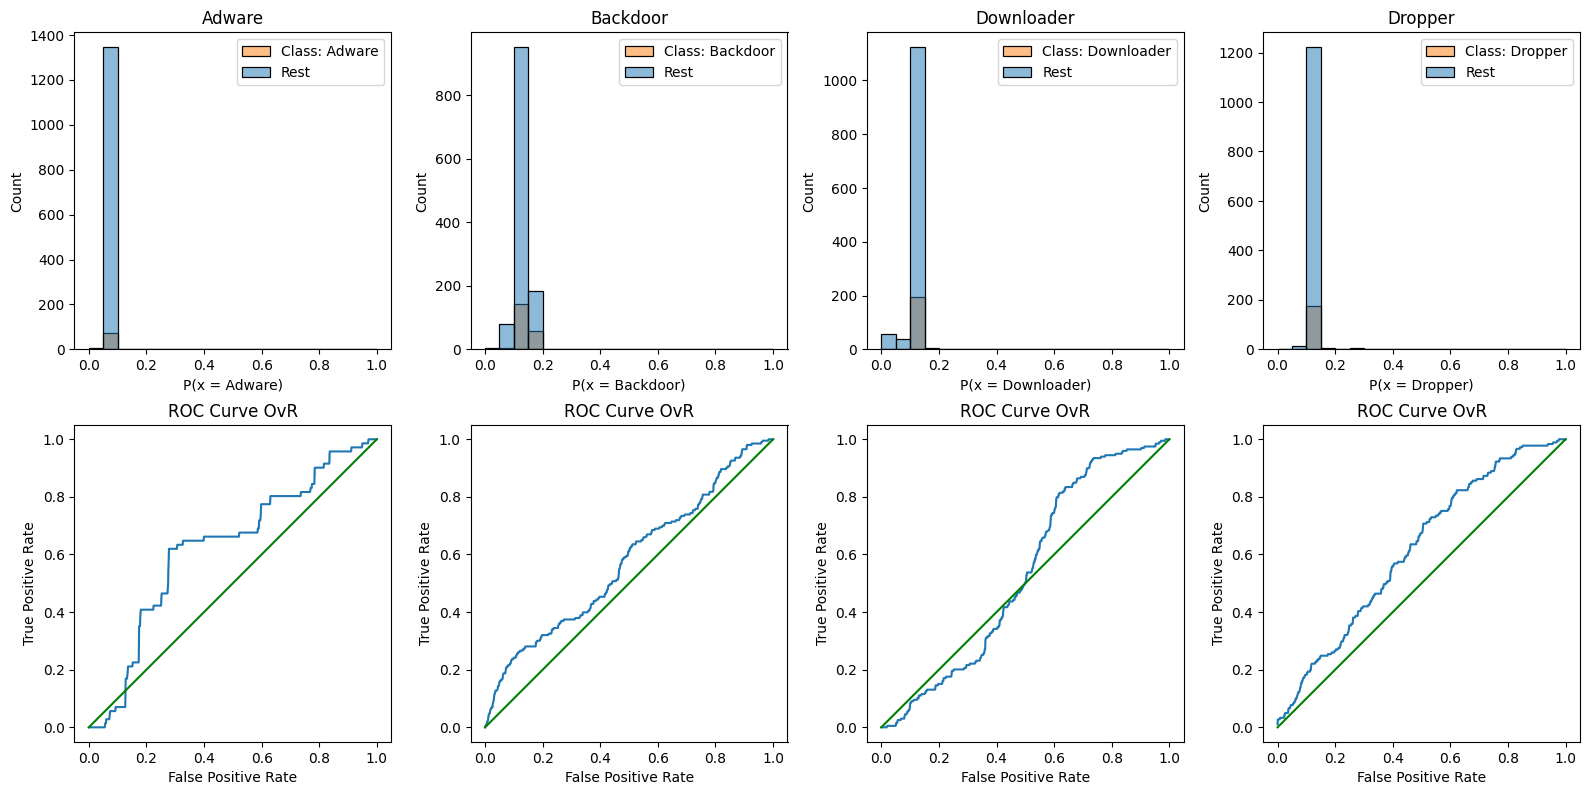

In [140]:
plt.figure(figsize = (16, 8))
bins = [i/20 for i in range(20)] + [1]
classes = le.classes_
roc_auc_ovr = {}
for i in range(0,4):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = pd.DataFrame(columns=['class', 'prob', 'y_test'])
    df_aux['y_test'] = y_test
    df_aux['class'] = [1 if rows == c else 0 for rows in df_aux['y_test']]

    df_aux['prob'] = y_score[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 4, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color='b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    

    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 4, i+5)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    ax_bottom.set_aspect('equal', 'box')
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

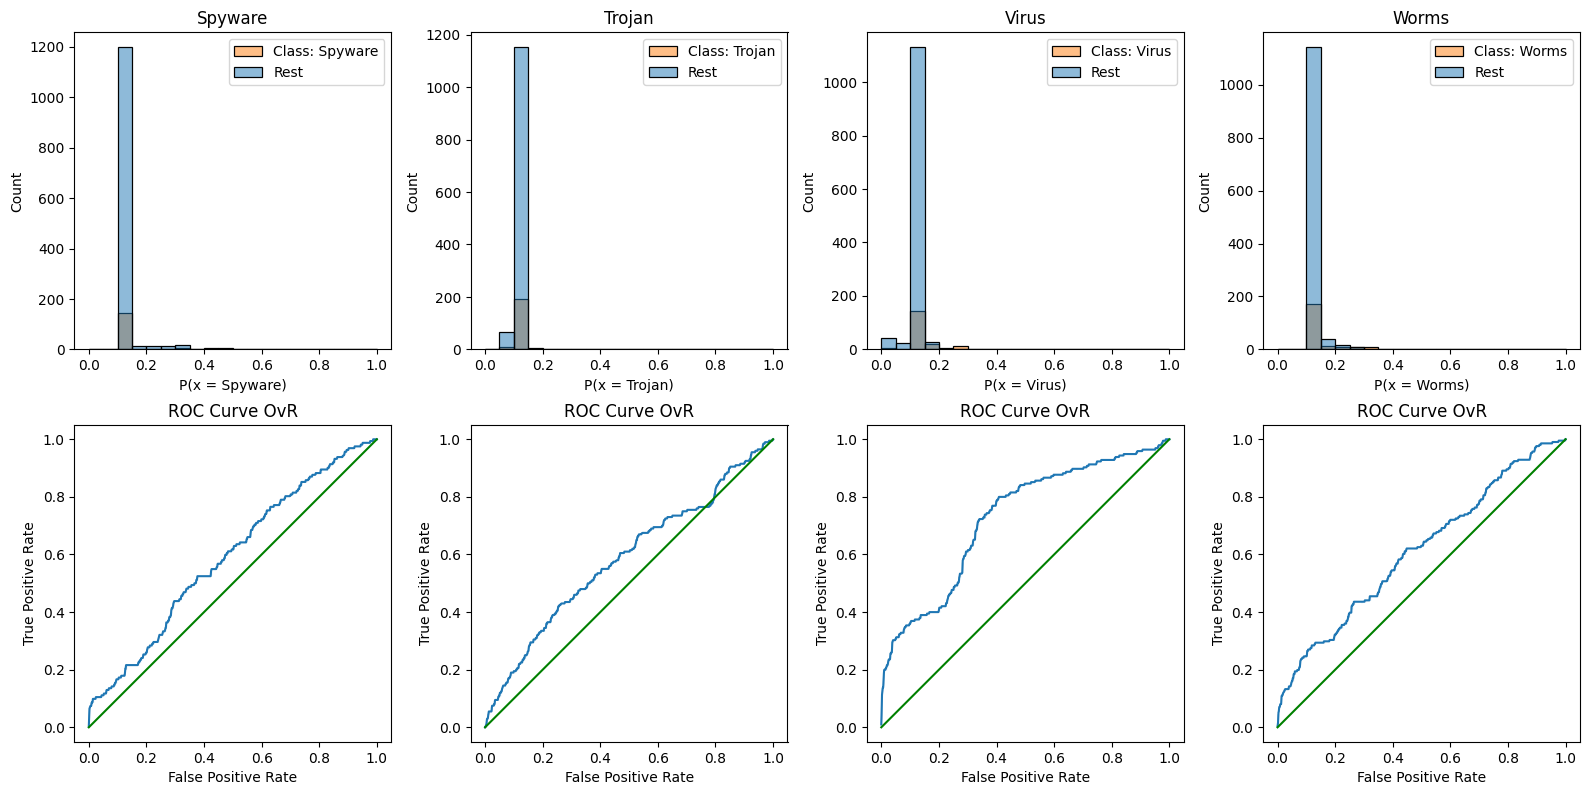

In [141]:
plt.figure(figsize = (16, 8))
bins = [i/20 for i in range(20)] + [1]
classes = le.classes_
for i in range(4,8):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = pd.DataFrame(columns=['class', 'prob', 'y_test'])
    df_aux['y_test'] = y_test
    df_aux['class'] = [1 if rows == c else 0 for rows in df_aux['y_test']]

    df_aux['prob'] = y_score[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 4, i-3)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color='b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    

    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 4, i+1)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    ax_bottom.set_aspect('equal', 'box')
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

In [143]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

Adware ROC AUC OvR: 0.6248
Backdoor ROC AUC OvR: 0.5752
Downloader ROC AUC OvR: 0.5345
Dropper ROC AUC OvR: 0.6159
Spyware ROC AUC OvR: 0.5904
Trojan ROC AUC OvR: 0.5856
Virus ROC AUC OvR: 0.7266
Worms ROC AUC OvR: 0.6110
average ROC AUC OvR: 0.6080


In [144]:
print(roc_auc_score(y_test_svm, y_score, multi_class='ovr', average='macro'))

0.6080023389013418


## Random Forest

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
le = LabelEncoder()
le.fit(['Adware', 'Backdoor', 'Downloader', 'Dropper', 'Spyware', 'Trojan', 'Virus', 'Worms'])
y_test_rf = le.transform(y_test)
y_train_rf = le.transform(y_train)

/home/slo/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/slo/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [147]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train_rf)

RandomForestClassifier()

### Classification Report

In [148]:
y_pred = clf.predict(X_test)

In [149]:
print(classification_report(y_test_rf, y_pred,digits=5))

              precision    recall  f1-score   support

           0    0.92424   0.85915   0.89051        71
           1    0.72512   0.75369   0.73913       203
           2    0.79670   0.72864   0.76115       199
           3    0.58605   0.69613   0.63636       181
           4    0.55556   0.61728   0.58480       162
           5    0.57558   0.49500   0.53226       200
           6    0.78947   0.84615   0.81683       195
           7    0.74866   0.66351   0.70352       211

    accuracy                        0.69550      1422
   macro avg    0.71267   0.70745   0.70807      1422
weighted avg    0.69935   0.69550   0.69538      1422



### AUC and ROC Curves

In [150]:
y_score = clf.predict_proba(X_test)

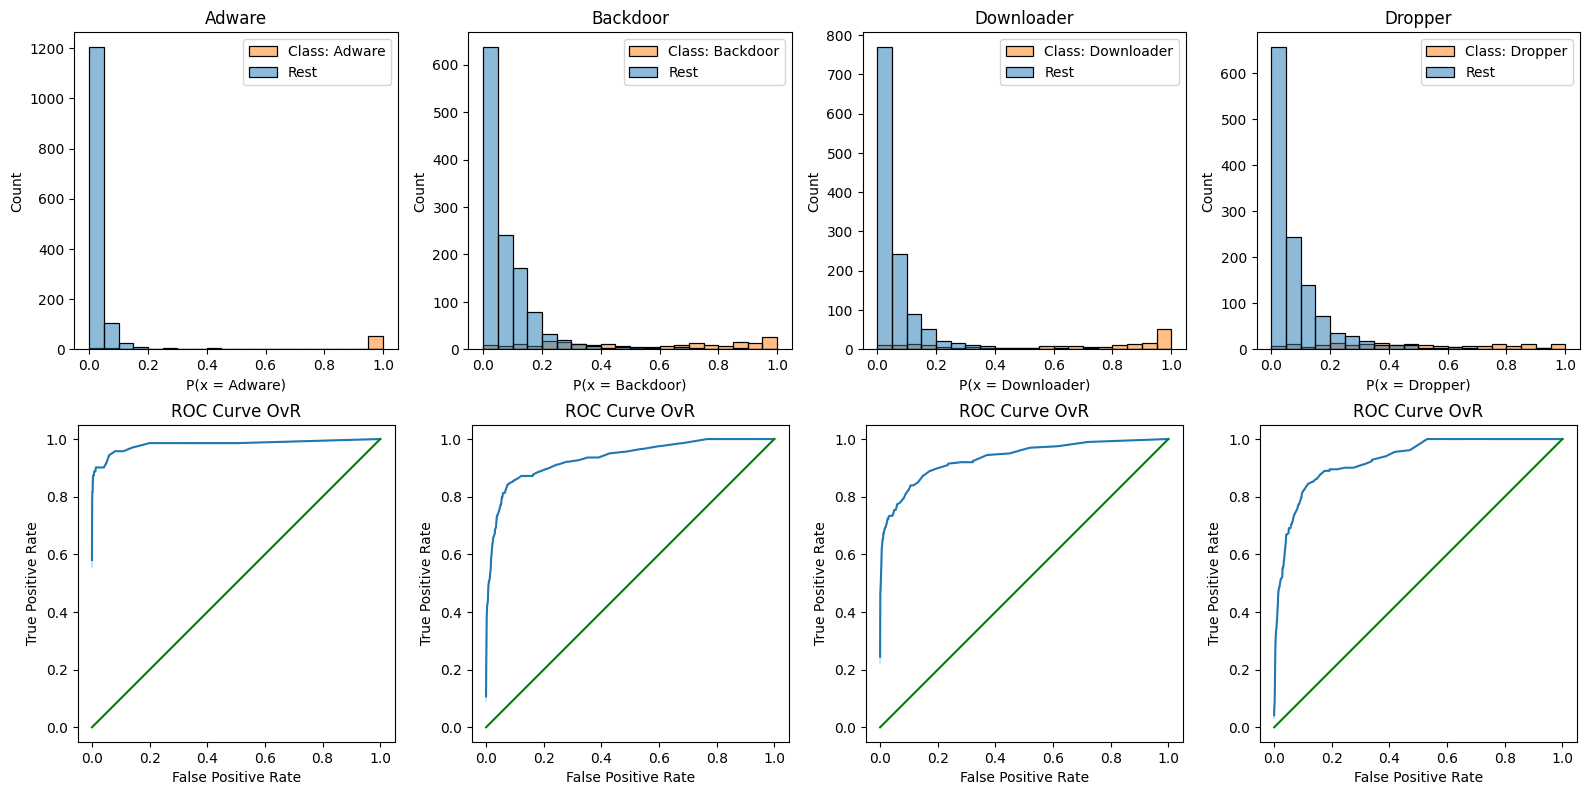

In [151]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns

plt.figure(figsize = (16, 8))
bins = [i/20 for i in range(20)] + [1]
classes = le.classes_
roc_auc_ovr = {}
for i in range(0,4):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = pd.DataFrame(columns=['class', 'prob', 'y_test'])
    df_aux['y_test'] = y_test
    df_aux['class'] = [1 if rows == c else 0 for rows in df_aux['y_test']]

    df_aux['prob'] = y_score[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 4, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color='b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    

    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 4, i+5)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    ax_bottom.set_aspect('equal', 'box')
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

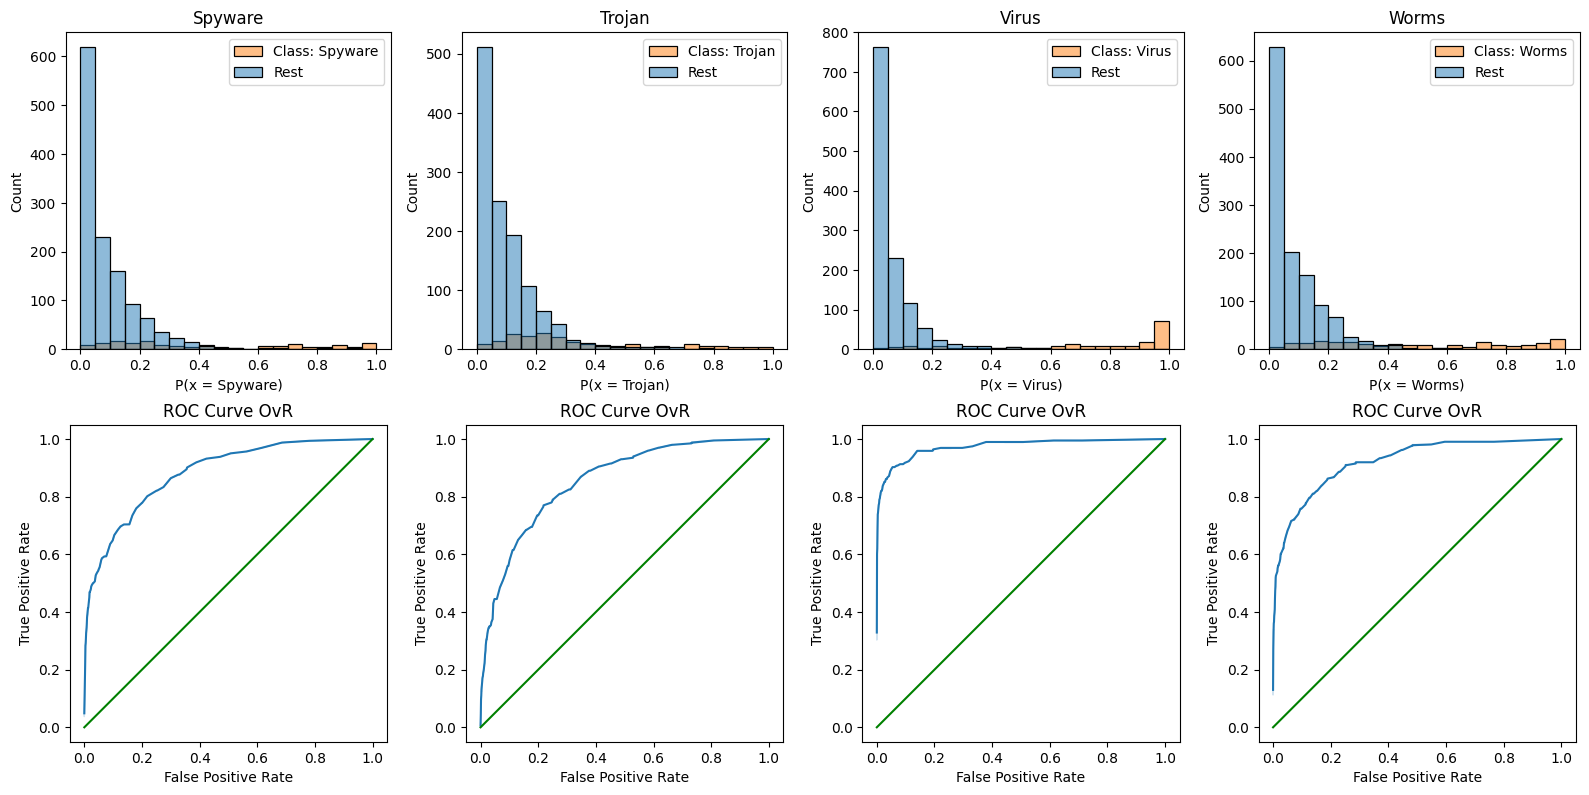

In [152]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns

plt.figure(figsize = (16, 8))
bins = [i/20 for i in range(20)] + [1]
classes = le.classes_
for i in range(4,8):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = pd.DataFrame(columns=['class', 'prob', 'y_test'])
    df_aux['y_test'] = y_test
    df_aux['class'] = [1 if rows == c else 0 for rows in df_aux['y_test']]

    df_aux['prob'] = y_score[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 4, i-3)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color='b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    

    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 4, i+1)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    ax_bottom.set_aspect('equal', 'box')
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

In [153]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

Adware ROC AUC OvR: 0.9815
Backdoor ROC AUC OvR: 0.9336
Downloader ROC AUC OvR: 0.9342
Dropper ROC AUC OvR: 0.9273
Spyware ROC AUC OvR: 0.8814
Trojan ROC AUC OvR: 0.8543
Virus ROC AUC OvR: 0.9735
Worms ROC AUC OvR: 0.9207
average ROC AUC OvR: 0.9258


In [154]:
## calculate auc
print(roc_auc_score(y_test_rf, y_score, multi_class='ovr', average='macro'))

0.9258149614275686


## Ada Boost

In [155]:
from sklearn.ensemble import AdaBoostClassifier

In [156]:
le = LabelEncoder()
le.fit(['Adware', 'Backdoor', 'Downloader', 'Dropper', 'Spyware', 'Trojan', 'Virus', 'Worms'])
y_test_ada = le.transform(y_test)
y_train_ada = le.transform(y_train)

/home/slo/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/slo/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [157]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train_ada)

AdaBoostClassifier()

### Classification Report

In [158]:
y_pred = clf.predict(X_test)

In [159]:
print(classification_report(y_test_ada, y_pred,digits=5))

              precision    recall  f1-score   support

           0    0.54412   0.52113   0.53237        71
           1    0.46207   0.33005   0.38506       203
           2    0.50198   0.63819   0.56195       199
           3    0.42784   0.45856   0.44267       181
           4    0.20455   0.11111   0.14400       162
           5    0.28111   0.30500   0.29257       200
           6    0.64655   0.76923   0.70258       195
           7    0.40889   0.43602   0.42202       211

    accuracy                        0.44655      1422
   macro avg    0.43464   0.44616   0.43540      1422
weighted avg    0.43001   0.44655   0.43306      1422



### AUC and ROC Curves

In [160]:
y_score = clf.predict_proba(X_test)

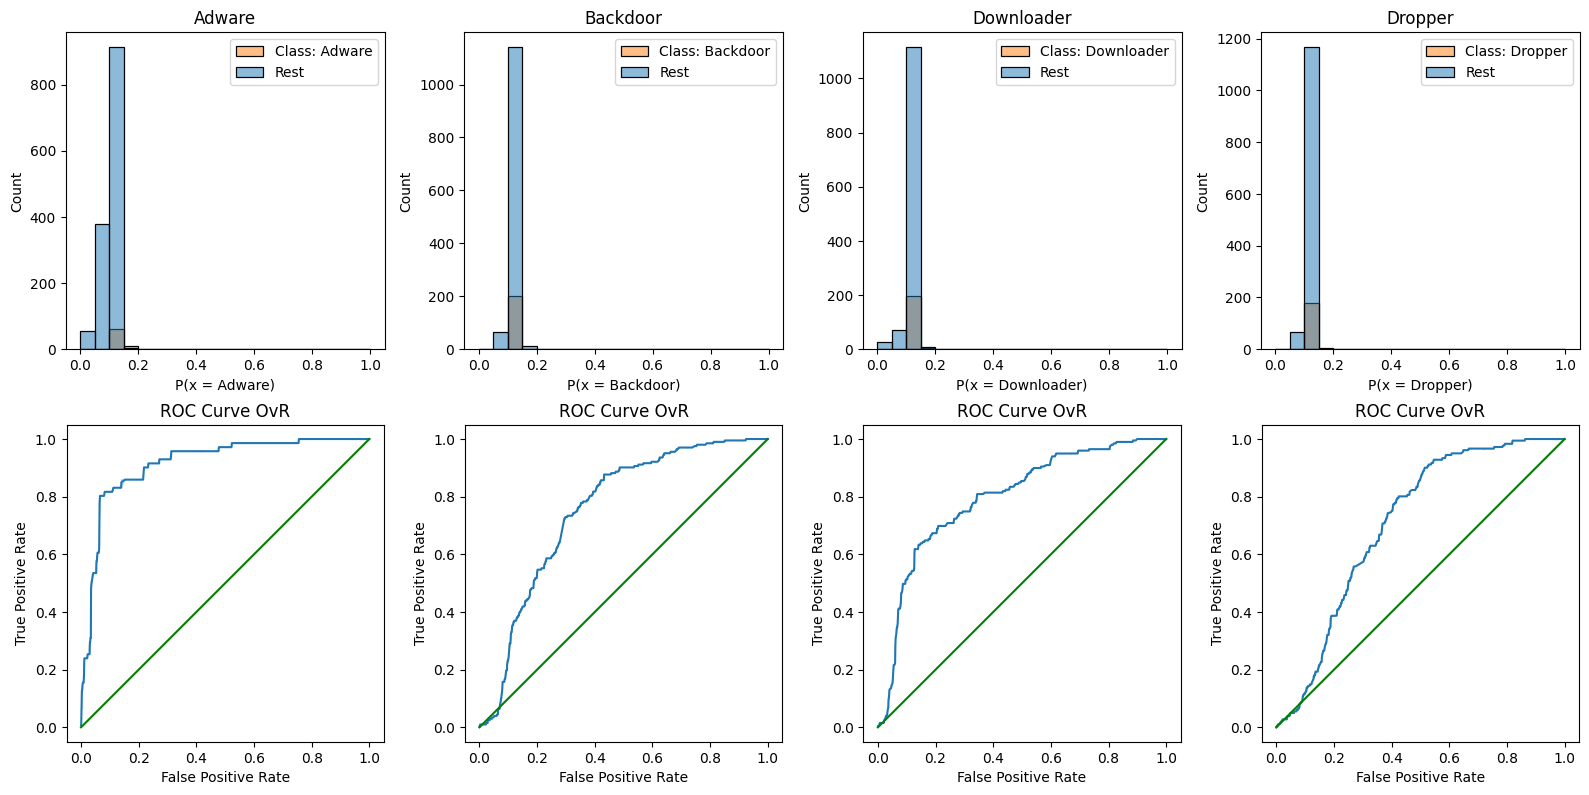

In [161]:
plt.figure(figsize = (16, 8))
bins = [i/20 for i in range(20)] + [1]
classes = le.classes_
roc_auc_ovr = {}
for i in range(0,4):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = pd.DataFrame(columns=['class', 'prob', 'y_test'])
    df_aux['y_test'] = y_test
    df_aux['class'] = [1 if rows == c else 0 for rows in df_aux['y_test']]

    df_aux['prob'] = y_score[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 4, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color='b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    

    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 4, i+5)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    ax_bottom.set_aspect('equal', 'box')
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

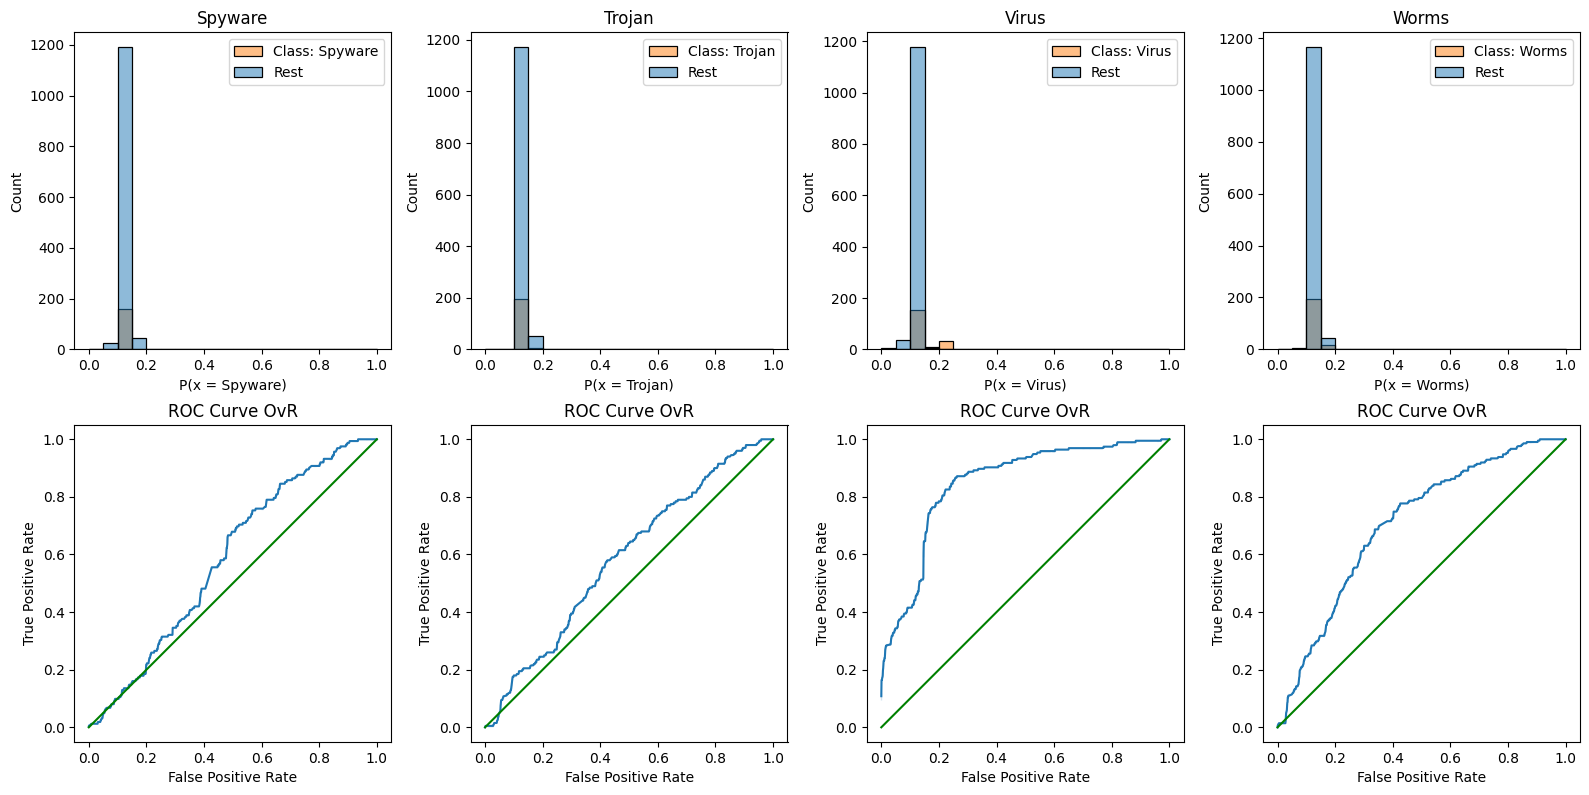

In [162]:
plt.figure(figsize = (16, 8))
bins = [i/20 for i in range(20)] + [1]
classes = le.classes_
for i in range(4,8):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = pd.DataFrame(columns=['class', 'prob', 'y_test'])
    df_aux['y_test'] = y_test
    df_aux['class'] = [1 if rows == c else 0 for rows in df_aux['y_test']]

    df_aux['prob'] = y_score[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 4, i-3)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color='b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    

    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 4, i+1)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    ax_bottom.set_aspect('equal', 'box')
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

In [163]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

Adware ROC AUC OvR: 0.9158
Backdoor ROC AUC OvR: 0.7549
Downloader ROC AUC OvR: 0.7961
Dropper ROC AUC OvR: 0.7085
Spyware ROC AUC OvR: 0.5836
Trojan ROC AUC OvR: 0.5852
Virus ROC AUC OvR: 0.8477
Worms ROC AUC OvR: 0.7056
average ROC AUC OvR: 0.7372


In [164]:
## calculate auc
print(roc_auc_score(y_test_rf, y_score, multi_class='ovr', average='macro'))

0.7371584331099401


## XG Boost

In [165]:
import xgboost as xgb

In [166]:
x_train_xgb = X_train
y_train_xgb = y_train

x_test_xgb = X_test
y_test_xgb = y_test

In [167]:
le = LabelEncoder()
le.fit(['Adware', 'Backdoor', 'Downloader', 'Dropper', 'Spyware', 'Trojan', 'Virus', 'Worms'])
y_test_xgb = le.transform(y_test_xgb)
y_train_xgb = le.transform(y_train_xgb)

/home/slo/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/slo/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [168]:
clf = xgb.XGBClassifier()

In [169]:
clf.fit(x_train_xgb, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

### Classification Report

In [170]:
y_pred = clf.predict(x_test_xgb)

In [171]:
clf.score(x_test_xgb, y_test_xgb)

0.6969057665260197

In [172]:
print(classification_report(y_test_xgb, y_pred,digits=5))

              precision    recall  f1-score   support

           0    0.93651   0.83099   0.88060        71
           1    0.74737   0.69951   0.72265       203
           2    0.84066   0.76884   0.80315       199
           3    0.61929   0.67403   0.64550       181
           4    0.51741   0.64198   0.57300       162
           5    0.52284   0.51500   0.51889       200
           6    0.83085   0.85641   0.84343       195
           7    0.73822   0.66825   0.70149       211

    accuracy                        0.69691      1422
   macro avg    0.71914   0.70688   0.71109      1422
weighted avg    0.70588   0.69691   0.69970      1422



### AUC and ROC Curves

In [173]:
y_score = clf.predict_proba(X_test)

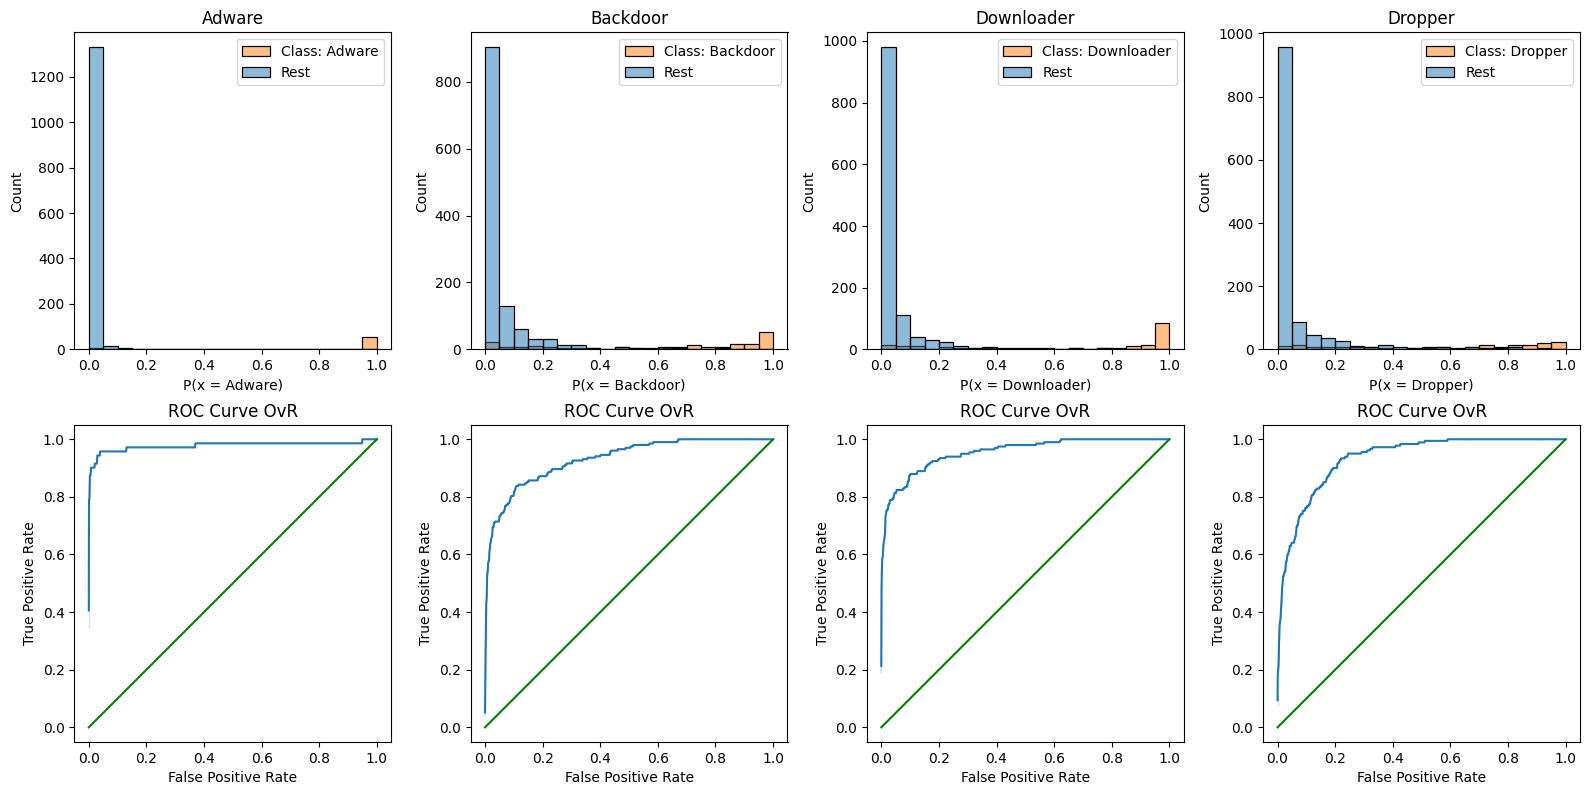

In [174]:
plt.figure(figsize = (16, 8))
bins = [i/20 for i in range(20)] + [1]
classes = le.classes_
roc_auc_ovr = {}
for i in range(0,4):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = pd.DataFrame(columns=['class', 'prob', 'y_test'])
    df_aux['y_test'] = y_test
    df_aux['class'] = [1 if rows == c else 0 for rows in df_aux['y_test']]

    df_aux['prob'] = y_score[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 4, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color='b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    

    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 4, i+5)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    ax_bottom.set_aspect('equal', 'box')
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

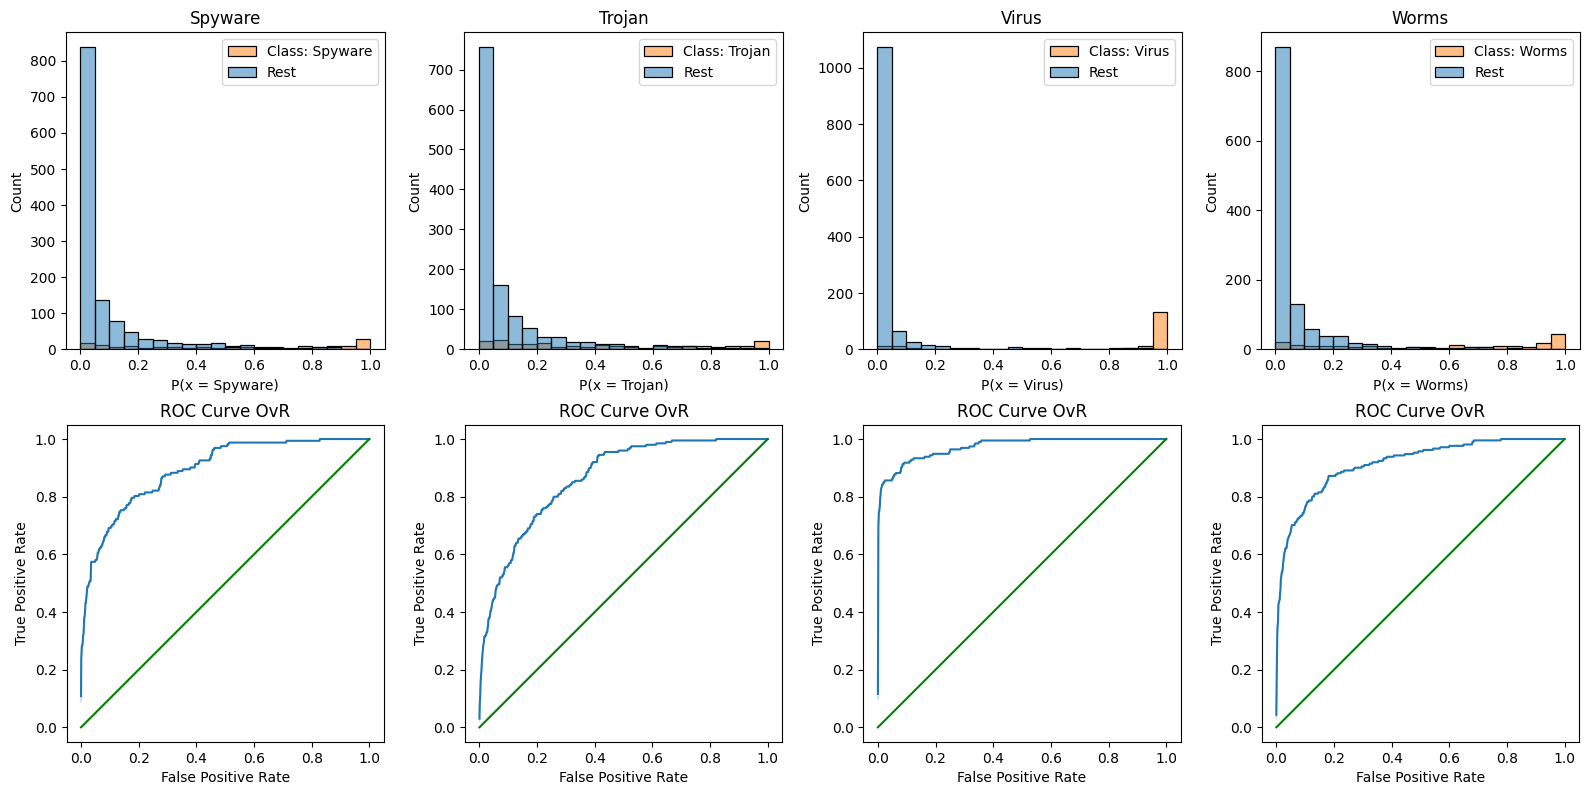

In [175]:
plt.figure(figsize = (16, 8))
bins = [i/20 for i in range(20)] + [1]
classes = le.classes_
for i in range(4,8):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = pd.DataFrame(columns=['class', 'prob', 'y_test'])
    df_aux['y_test'] = y_test
    df_aux['class'] = [1 if rows == c else 0 for rows in df_aux['y_test']]

    df_aux['prob'] = y_score[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 4, i-3)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color='b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    

    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 4, i+1)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    ax_bottom.set_aspect('equal', 'box')
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

In [176]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

Adware ROC AUC OvR: 0.9775
Backdoor ROC AUC OvR: 0.9308
Downloader ROC AUC OvR: 0.9547
Dropper ROC AUC OvR: 0.9329
Spyware ROC AUC OvR: 0.8939
Trojan ROC AUC OvR: 0.8633
Virus ROC AUC OvR: 0.9728
Worms ROC AUC OvR: 0.9156
average ROC AUC OvR: 0.9302


In [177]:
## calculate auc
print(roc_auc_score(y_test_rf, y_score, multi_class='ovr', average='macro'))

0.9302054695231644


## DL avec keras

In [191]:
from keras import Sequential
from keras.layers import Dense, Activation

2023-06-27 01:18:46.221854: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-27 01:18:46.402573: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-27 01:18:46.407237: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-27 01:18:47.884830: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [192]:
n_inputs = X_train.shape[1]
n_ouputs = y_train.shape[1]

In [193]:
model = Sequential()
model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(10, activation='relu'))

model.add(Dense(8, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [194]:
X_train_pd = X_train.toarray()
X_test_pd = X_test.toarray()
y_train_pd = y_train.to_numpy()
y_test_pd = y_test.to_numpy()

In [195]:
count_vect = CountVectorizer()
y_train_pd = count_vect.fit_transform(y_train_pd[:,0])
y_test_pd = count_vect.transform(y_test_pd[:,0])

y_train_pd = y_train_pd.toarray()
y_test_pd = y_test_pd.toarray()

In [196]:
y_train_pd_2 = np.asarray(y_train_pd).astype('float32').reshape((-1,1))
y_test_pd_2 = np.asarray(y_test_pd).astype('float32').reshape((-1,1))

In [197]:
model.fit(X_train_pd, y_train_pd, epochs=100, verbose='auto')

Epoch 1/100
178/178 [==============================] - 2s 3ms/step - loss: 138.3894
Epoch 2/100
178/178 [==============================] - 0s 2ms/step - loss: 24.5436
Epoch 3/100
178/178 [==============================] - 0s 2ms/step - loss: 7.6165
Epoch 4/100
178/178 [==============================] - 0s 2ms/step - loss: 4.3454
Epoch 5/100
178/178 [==============================] - 0s 2ms/step - loss: 2.7569
Epoch 6/100
178/178 [==============================] - 0s 2ms/step - loss: 2.0992
Epoch 7/100
178/178 [==============================] - 0s 2ms/step - loss: 2.1595
Epoch 8/100
178/178 [==============================] - 0s 2ms/step - loss: 1.3910
Epoch 9/100
178/178 [==============================] - 0s 2ms/step - loss: 1.2524
Epoch 10/100
178/178 [==============================] - 0s 2ms/step - loss: 0.9523
Epoch 11/100
178/178 [==============================] - 0s 2ms/step - loss: 0.8182
Epoch 12/100
178/178 [==============================] - 0s 2ms/step - loss: 0.7435
Epoch 13/1

In [198]:
model.evaluate(X_test_pd, y_test_pd)

45/45 [==============================] - 0s 2ms/step - loss: 0.5993


0.5993318557739258

In [199]:
model.get_metrics_result()

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.59933186>}

In [ ]:
from sklearn.metrics import accuracy_score

# Prédictions sur les données de test
y_pred_probs = model.predict(X_test_pd)
y_pred = (y_pred_probs > 0.5).astype(int)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test_pd, y_pred)

# Rapport de classification
report = classification_report(y_test_pd, y_pred, digits=5)
print("Accuracy:", accuracy)
print(report)

### AUC and ROC Curves

In [201]:
# Prédictions sur les données de test
y_score = model.predict(X_test_pd)

 1/45 [..............................] - ETA: 1s

45/45 [==============================] - 0s 2ms/step


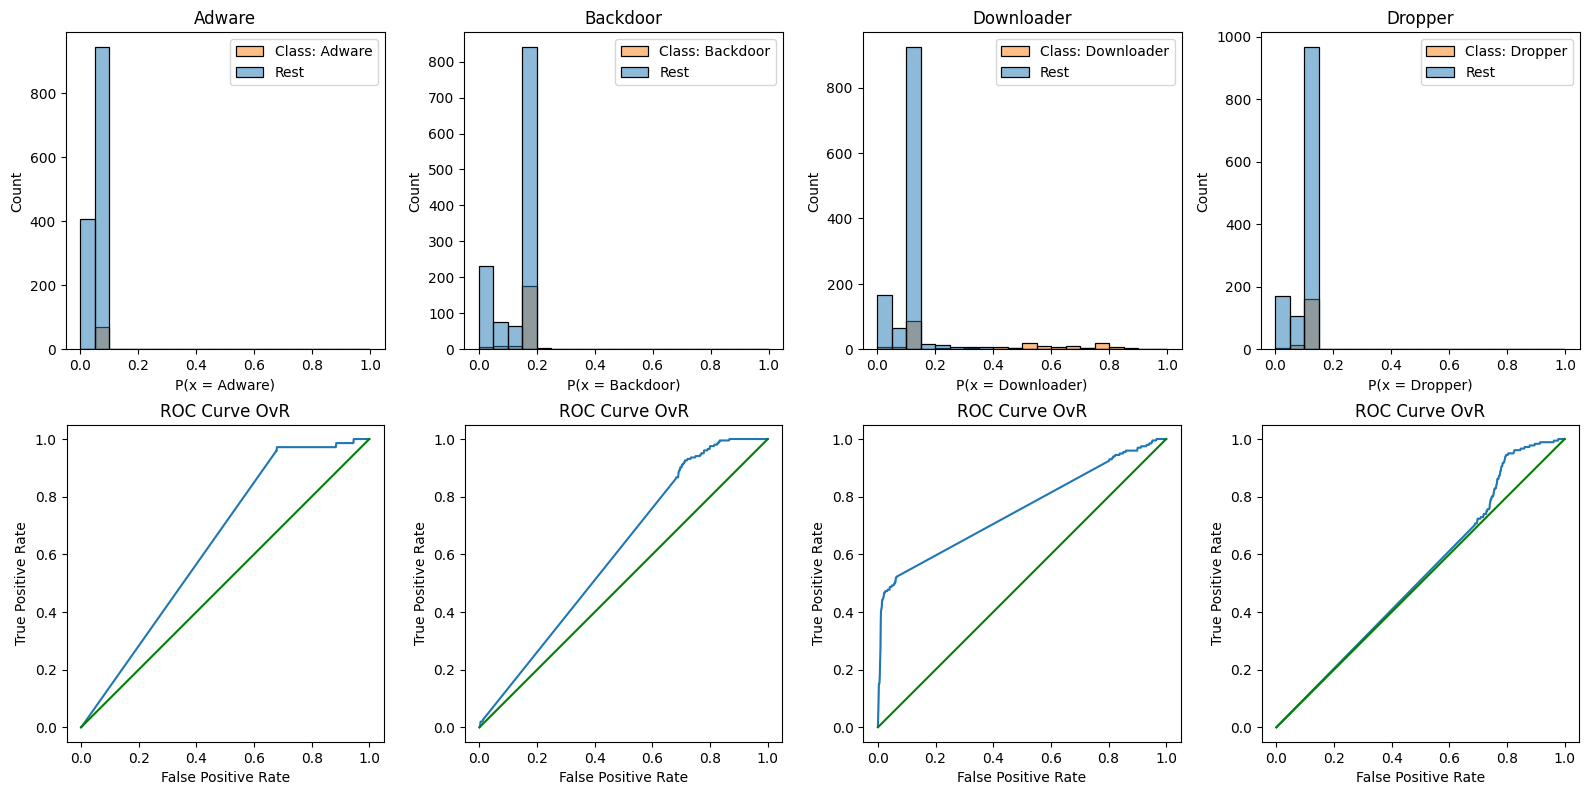

In [202]:
plt.figure(figsize = (16, 8))
bins = [i/20 for i in range(20)] + [1]
classes = le.classes_
roc_auc_ovr = {}
for i in range(0,4):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = pd.DataFrame(columns=['class', 'prob', 'y_test'])
    df_aux['y_test'] = y_test
    df_aux['class'] = [1 if rows == c else 0 for rows in df_aux['y_test']]

    df_aux['prob'] = y_score[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 4, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color='b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    

    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 4, i+5)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    ax_bottom.set_aspect('equal', 'box')
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

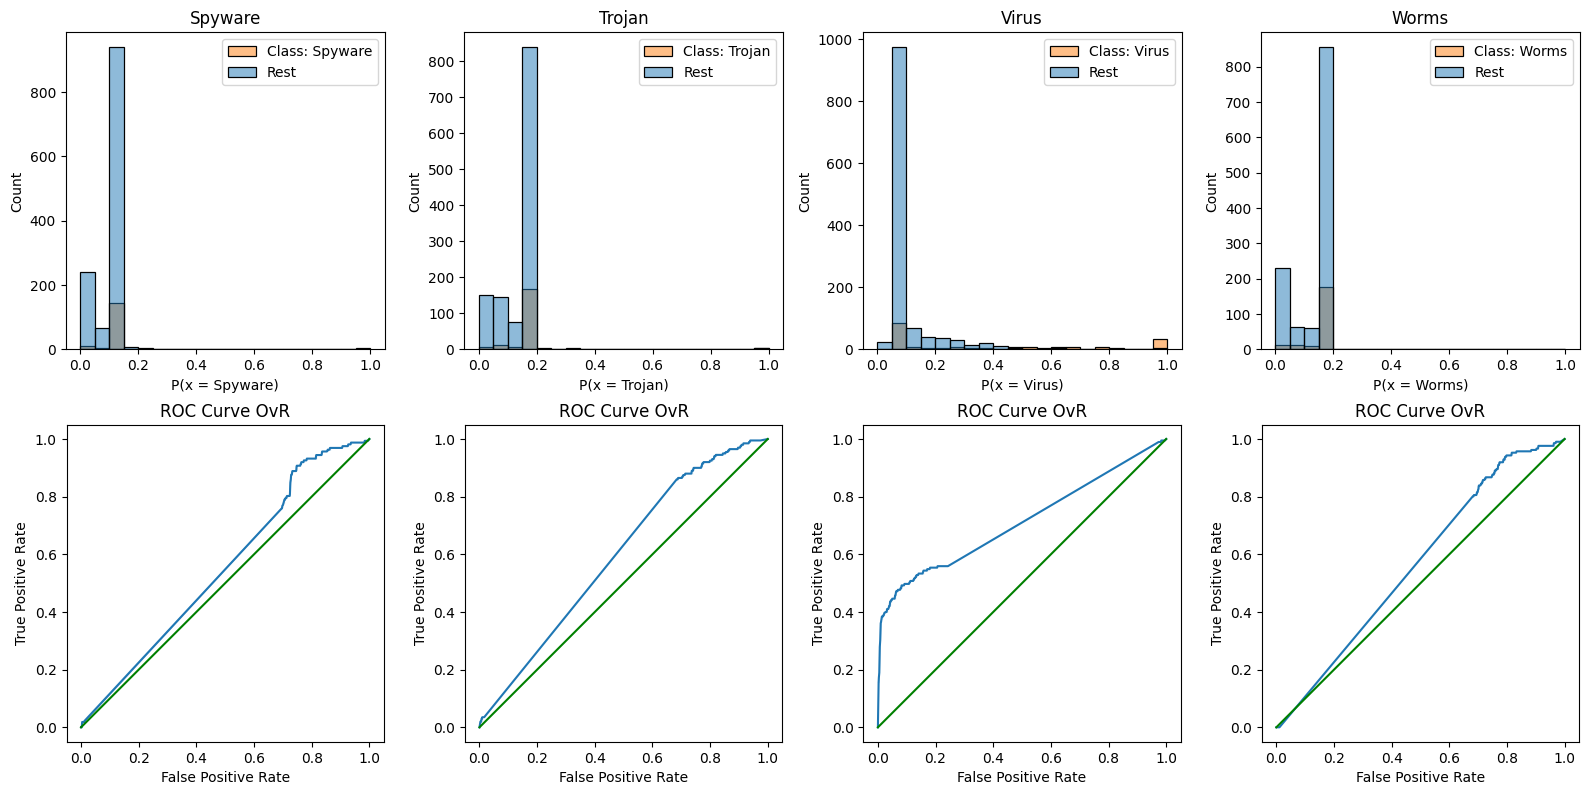

In [203]:
plt.figure(figsize = (16, 8))
bins = [i/20 for i in range(20)] + [1]
classes = le.classes_
for i in range(4,8):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = pd.DataFrame(columns=['class', 'prob', 'y_test'])
    df_aux['y_test'] = y_test
    df_aux['class'] = [1 if rows == c else 0 for rows in df_aux['y_test']]

    df_aux['prob'] = y_score[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 4, i-3)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color='b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    

    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 4, i+1)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    ax_bottom.set_aspect('equal', 'box')
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

In [204]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

Adware ROC AUC OvR: 0.6403
Backdoor ROC AUC OvR: 0.6073
Downloader ROC AUC OvR: 0.7528
Dropper ROC AUC OvR: 0.5269
Spyware ROC AUC OvR: 0.5535
Trojan ROC AUC OvR: 0.5968
Virus ROC AUC OvR: 0.7113
Worms ROC AUC OvR: 0.5657
average ROC AUC OvR: 0.6193


In [207]:
## calculate auc
print(roc_auc_score(y_test_pd, y_score, multi_class='ovr', average='macro'))

0.6193222793947186


## MLPC Classifier   

In [178]:
from sklearn.neural_network import MLPClassifier

In [180]:
le = LabelEncoder()
le.fit(['Adware', 'Backdoor', 'Downloader', 'Dropper', 'Spyware', 'Trojan', 'Virus', 'Worms'])
y_test_xgb = le.transform(y_test)
y_train_xgb = le.transform(y_train)

/home/slo/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/slo/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [181]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100, 100), random_state=1)

In [182]:
clf.fit(X_train, y_train)

/home/slo/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(100, 100), random_state=1)

### Classification Report

In [183]:
y_pred = clf.predict(X_test)

In [184]:
print(classification_report(y_test, y_pred,digits=5))

              precision    recall  f1-score   support

      Adware    0.87719   0.70423   0.78125        71
    Backdoor    0.46222   0.51232   0.48598       203
  Downloader    0.66667   0.62312   0.64416       199
     Dropper    0.40000   0.47514   0.43434       181
     Spyware    0.34426   0.25926   0.29577       162
      Trojan    0.33880   0.31000   0.32376       200
       Virus    0.54098   0.67692   0.60137       195
       Worms    0.47895   0.43128   0.45387       211

    accuracy                        0.48594      1422
   macro avg    0.51363   0.49903   0.50256      1422
weighted avg    0.48612   0.48594   0.48286      1422



### AUC and ROC Curves

In [185]:
y_score = clf.predict_proba(X_test)

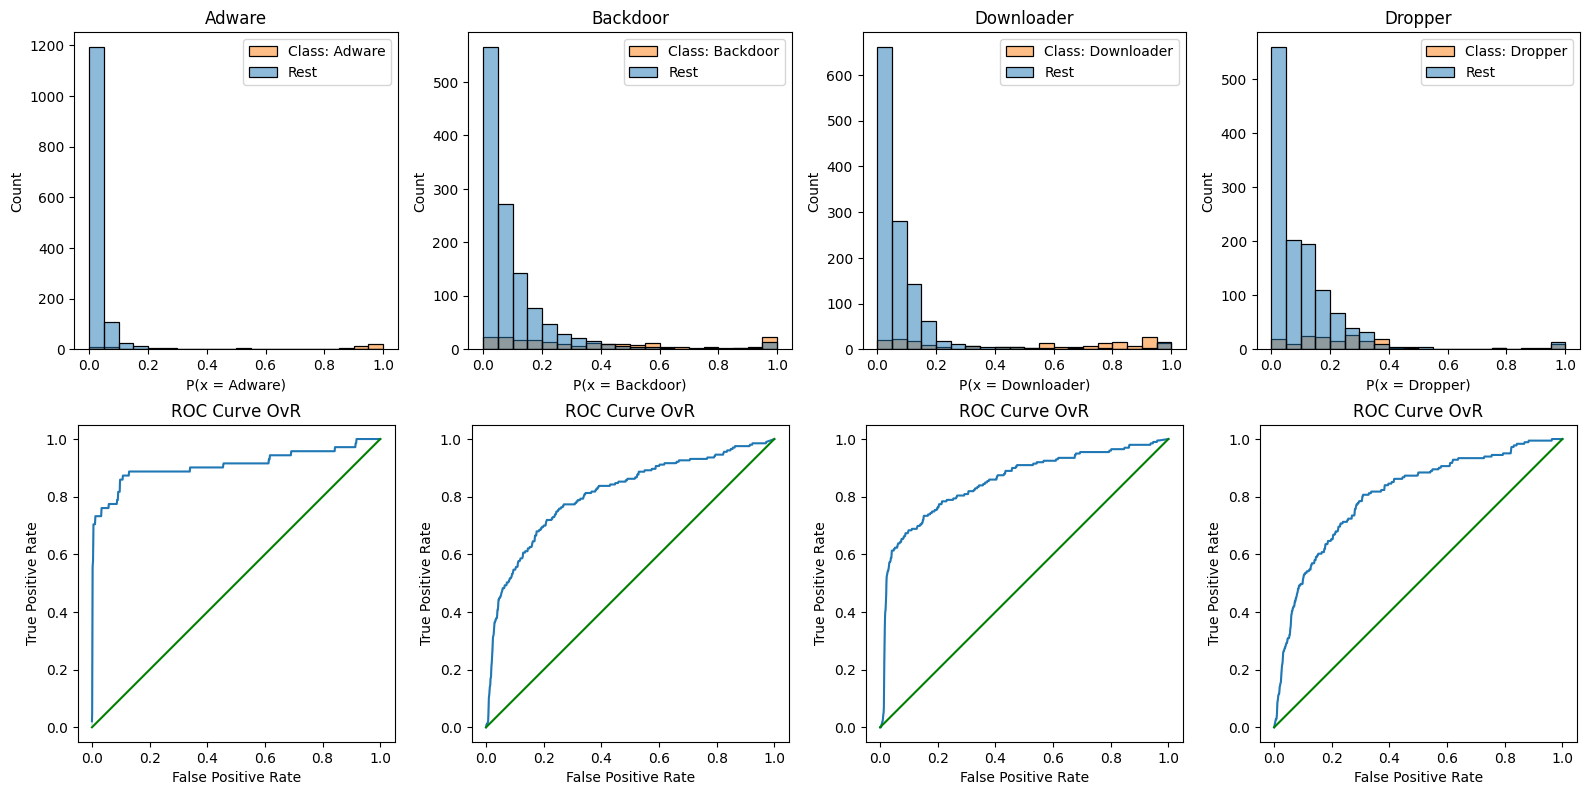

In [186]:
plt.figure(figsize = (16, 8))
bins = [i/20 for i in range(20)] + [1]
classes = le.classes_
roc_auc_ovr = {}
for i in range(0,4):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = pd.DataFrame(columns=['class', 'prob', 'y_test'])
    df_aux['y_test'] = y_test
    df_aux['class'] = [1 if rows == c else 0 for rows in df_aux['y_test']]

    df_aux['prob'] = y_score[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 4, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color='b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    

    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 4, i+5)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    ax_bottom.set_aspect('equal', 'box')
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

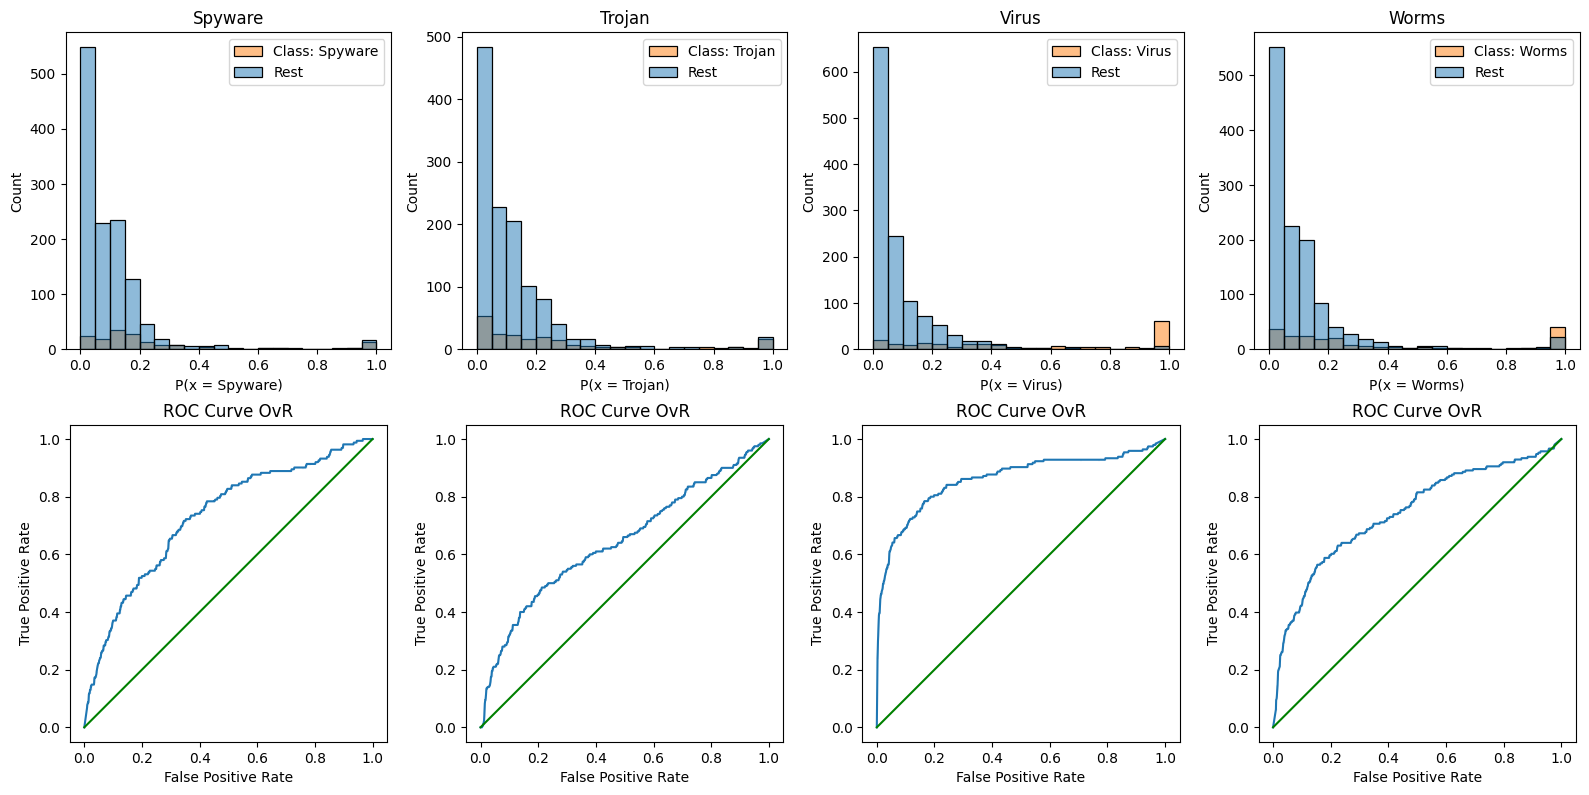

In [187]:
plt.figure(figsize = (16, 8))
bins = [i/20 for i in range(20)] + [1]
classes = le.classes_
for i in range(4,8):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = pd.DataFrame(columns=['class', 'prob', 'y_test'])
    df_aux['y_test'] = y_test
    df_aux['class'] = [1 if rows == c else 0 for rows in df_aux['y_test']]

    df_aux['prob'] = y_score[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 4, i-3)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color='b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    

    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 4, i+1)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    ax_bottom.set_aspect('equal', 'box')
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

In [188]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

Adware ROC AUC OvR: 0.9095
Backdoor ROC AUC OvR: 0.8096
Downloader ROC AUC OvR: 0.8529
Dropper ROC AUC OvR: 0.8032
Spyware ROC AUC OvR: 0.7297
Trojan ROC AUC OvR: 0.6454
Virus ROC AUC OvR: 0.8618
Worms ROC AUC OvR: 0.7436
average ROC AUC OvR: 0.7945


In [189]:
## calculate auc
print(roc_auc_score(y_test_rf, y_score, multi_class='ovr', average='macro'))

0.7944551398809798
